## Perceptron Model
We here use the perceptron model in the Scikit-learn library which is similar to the we have explicitly implemented and trained using the iris datasets.
Here we have also showed the powerful usage of scikit-learn library which can be used to import different datasets for training on different models and also their implementation of different models for training on different datasets and performance.
We have also showed the use of different preprocessing modules of scikit-learn to preprocess and hence use the dataset accordingly for training on the model

In [2]:
## Importing the required libraries
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from Decision_Boundary import plot_decision_boundary

### Preprocessing the Data
We have used the required modules and methods to preprocess the data and hence used them accordingly for the model training.

In [3]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
X_train , X_test ,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 1,stratify = y)

# Standardizing the features

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

### Training the Model
We have here trained the model on the dataset and hence achieved the accuracy.We can also tune the parameters to obtain the required model accuracy.
The parameters used here are very similar to the model we have trained before explicitly and can be used accordingly.

Misclassified samples: 1
Accuracy: 0.98
Accuracy: 0.98


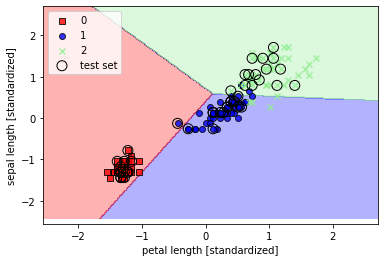

In [4]:
ppn = Perceptron(max_iter = 40,eta0 = 0.1,random_state = 1)
ppn.fit(X_train_std,y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))
print('Accuracy: %.2f' % ppn.score(X_test_std,y_test))
plot_decision_boundary(X=X_combined_std,
                       y = y_combined,
                       classifier=ppn,
                       test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('sepal length [standardized]')
plt.legend(loc = 'upper left')
plt.show()